# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_a=pd.read_csv('5_a.csv') # reading .csv files
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
# Predicting y values using mentioned thresholds by np.where function
df_a['y_pred']=np.where(df_a['proba']<0.5,float(0),float(1))
df_a.head()

,y,proba,y_pred
0,1.0,0.637387,1.0
1,1.0,0.635165,1.0
2,1.0,0.766586,1.0
3,1.0,0.724564,1.0
4,1.0,0.889199,1.0


## Confusion Matrix

+ [ TN   FP ]</br> 
[ FN   TP ]

In [4]:
# Confusion Matrix function takes actual & predicted values of y
# It returns confusion matrix & dictionary form of the same
def conf_mat(ytr,ypr):
    tn = 0
    fn = 0
    tp = 0
    fp = 0
    # for checking every datapoint with predicted values
    for i in range(len(ytr)):
        if (ytr[i]==1.0) and (ypr[i]==1.0):
            tp += 1
        elif (ytr[i]==1.0) and (ypr[i]==0.0):
            fn += 1
        elif (ytr[i]==0.0) and (ypr[i]==1.0):
            fp += 1
        elif (ytr[i]==0.0) and (ypr[i]==0.0):
            tn += 1
    values_dict = {'tp':tp, 'fn':fn, 'fp':fp, 'tn':tn}
    mat = np.array([[tn,fp],[fn,tp]])
        
    return mat,values_dict

## F1- Score
+ precision = TP / ( TP + FP )
+ recall = TP / ( TP + FN )

     #### F1-Score = 2\* precision\* recall / ( precision + recall )

In [5]:
# F1 score function takes confusion matrix dictionary as parameter 
# it returns calculated F1 score as per above formula
def f1_score(conf_dict):
    precision = conf_dict['tp']/(conf_dict['tp']+conf_dict['fp'])
    recall = conf_dict['tp']/(conf_dict['tp']+conf_dict['fn'])
    f1 = (2*precision*recall)/(precision + recall)
    return f1    

## Accuracy

In [6]:
#Accuracy function takes confusion matrix dictionary as parameter
# it returns accuracy i.e. total data points correctly predicted by total no. of data points
def Accuracy(conf_dict):
    acc = (conf_dict['tp']+conf_dict['tn'])/(conf_dict['tp']+conf_dict['tn']+conf_dict['fp']+conf_dict['fn'])
    return acc

## AUC
* TPR = TP/(TP+FN)
* FPR = FP/(FP+TN)

In [24]:
from tqdm import tqdm

# AUC (Area Under the Curve) it takes pandas dataframe as input parameter
# it return auc by using np.trapz(TPR,FPR),FPR&TPR array
def auc(df):
    fpr = [] 
    tpr = []
    for i in tqdm(df['proba']):
        df['y_pred'] = np.where(df['proba']<i,float(0),float(1))
        mat,d = conf_mat(df['y'],df['y_pred'])
        fpr.append(d['fp']/(d['fp']+d['tn']))
        tpr.append(d['tp']/(d['tp']+d['fn']))
        df.drop(columns = ['y_pred'])
    return np.trapz(tpr,fpr),tpr,fpr

In [25]:
df_a['y'].value_counts()

1.0    10000
0.0      100
Name: y, dtype: int64

In [26]:
confusion_matrix,mat_dict = conf_mat(df_a['y'],df_a['y_pred'])
print('Confusion Matrix:\n',confusion_matrix)

Confusion Matrix:
 [[    0   100]
 [    0 10000]]


In [27]:
F1 = f1_score(mat_dict)
print('F1-Score: ',F1)

F1-Score:  0.9950248756218906


In [28]:
sorted_df = df_a.sort_values(by = 'proba',ascending = False)
sorted_df.drop(columns=['y_pred'])
AUC,tpr,fpr= auc(sorted_df)
print('AUC: ', AUC)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [19:00<00:00,  8.86it/s]

AUC:  0.48829900000000004


Text(0.5, 1.0, 'AUC = 0.4883')

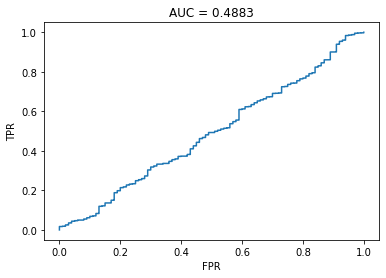

In [29]:
import matplotlib.pyplot as plt
# Plotting ROC using FPR & TPR
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC = {}'.format(round(AUC,4)))

In [30]:
accuracy = Accuracy(mat_dict)
print('Accuracy: ',accuracy)

Accuracy:  0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [31]:
df_b=pd.read_csv('5_b.csv')# Reading .csv files
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [32]:
# Predicting y values using mentioned thresholds by np.where function
df_b['y_pred'] = np.where(df_b['proba']<0.5,0.0,1.0)
df_b['y_pred'].value_counts()

0.0    9806
1.0     294
Name: y_pred, dtype: int64

In [33]:
CM_b,mat_dict_b = conf_mat(df_b['y'],df_b['y_pred'])
print('Confusion Matrix:\n',CM_b)

Confusion Matrix:
 [[9761  239]
 [  45   55]]


In [34]:
F1_b = f1_score(mat_dict_b)
print('F1-Score: ',F1_b)

F1-Score:  0.2791878172588833


In [35]:
sorted_df_b = df_b.sort_values(by = 'proba',ascending = False)
sorted_df_b.drop(columns = ['y_pred'])
AUC,tpr_b,fpr_b = auc(sorted_df_b)
print('AUC: ', AUC)

100%|████████████████████████████████████████████████████████████████████████████| 10100/10100 [37:45<00:00,  4.46it/s]

AUC:  0.9377570000000001


Text(0.5, 1.0, 'AUC = 0.9378')

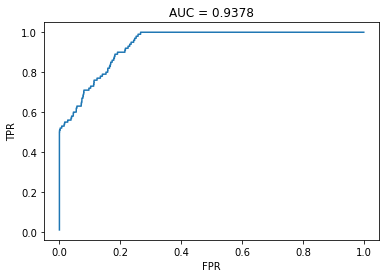

In [36]:
# Plotting ROC using FPR & TPR
plt.plot(fpr_b,tpr_b)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC = {}'.format(round(AUC,4)))

In [37]:
accuracy_b = Accuracy(mat_dict_b)
print('Accuracy: ',accuracy_b)

Accuracy:  0.9718811881188119


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [38]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [39]:
# Threshold function takes pandas dataframe as input parameter
# It returns Threshold which gives min value of metric A
def threshold(df):
    min_ = float('inf')
    for i in tqdm(df['prob']):
        df['y_pred'] = np.where(df['prob']<i,float(0),float(1))
        mat,d = conf_mat(df['y'],df['y_pred'])
        A = (500*d['fn'])+(100*d['fp'])# Metric A as mentioned above
        # if condition to calculate min metric A
        if A < min_:
            min_ = A
            thresh = i
        df.drop(columns = ['y_pred'])
    return min_,thresh

In [40]:
# sorting the dataframe by descending order of probabilities
sorted_df_c = df_c.sort_values(by = 'prob',ascending = False)
threshold(sorted_df_c)

100%|██████████████████████████████████████████████████████████████████████████████| 2852/2852 [05:24<00:00,  8.79it/s]


(141000, 0.2300390278970873)


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [41]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


## Mean Square Error

In [42]:
# Mean square error takes actual and predicted values of y as input parameters
def MSE(y,ypr):
    mse = np.mean((y-ypr)**2) #Implementing MSE formulae 
    return mse

In [43]:
print('Mean Squared Error: ',MSE(df_d['y'],df_d['pred']))

Mean Squared Error:  177.16569974554707


## Mean Absolute Percentage Error

In [44]:
# Mean absolute percentage error takes actual and predicted values of y as input parameters
def MAPE(y,ypr):
    mape = np.mean(np.abs(y-ypr)/np.mean(y))*100 # Implementing MAPE formulae
    return mape

In [45]:
print('Mean Absolute Percentage Error: ',MAPE(df_d['y'],df_d['pred']))

Mean Absolute Percentage Error:  12.912029940096314


## R Square Error / Coefficient of determination

In [46]:
# R square error takes actual and predicted values of y as input parameters
def R_square(y,ypr):
    SS_res = np.sum((y-ypr)**2) # implementing residual sum of squares
    SS_tot = np.sum((y-np.mean(y))**2) # implementing total sum of sqares
    r_2 = 1-(SS_res/SS_tot) # using above eqautions to implement R-Square error
    return r_2

In [47]:
print('R Sqaure Error: ',R_square(df_d['y'],df_d['pred']))

R Sqaure Error:  0.9563582786990937
